In [1]:
import numpy as np
from assortativity import measures as m
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

FIGURE #1

In [8]:
r1 = np.load("notebook_experiments/data/r1_er100.npy")
la_deg_er = np.load("notebook_experiments/results/r2_la_deg_er.npy")
la_rand_er = np.load("notebook_experiments/results/r2_la_rand_er.npy")
ga_deg_er = np.load("notebook_experiments/results/r2_ga_deg_er.npy")
ga_rand_er = np.load("notebook_experiments/results/r2_ga_rand_er.npy")
w_er = np.load("notebook_experiments/data/r2_w_er.npy")
randNb = np.load("notebook_experiments/data/r2_rand_prop.npy")

Mean Local Assortativity: -0.02125747175770618
Mean Global Assortativity: -0.007703620929399848


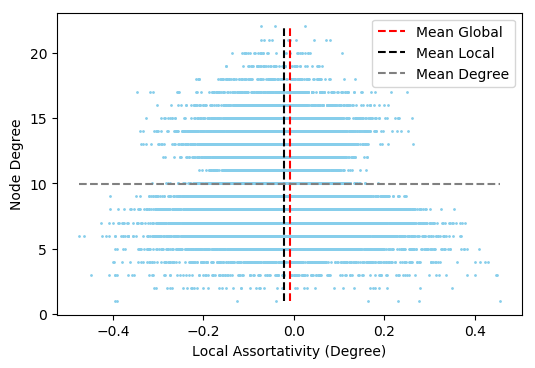

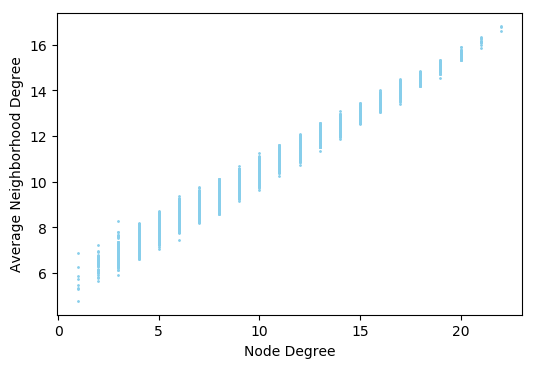

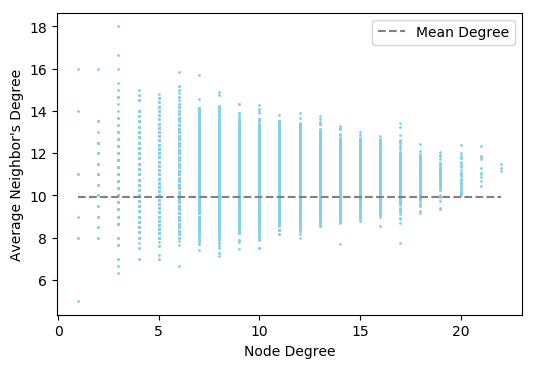

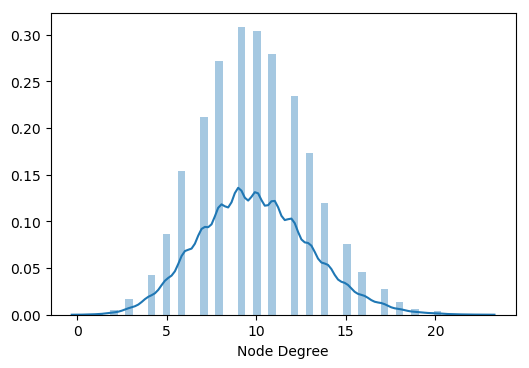

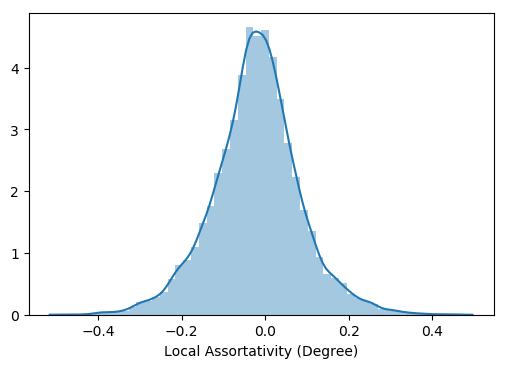

In [10]:
plt.figure(dpi=100)
deg_all = np.sum(r1, axis=1).reshape(-1)
la_deg_all = la_deg_er.reshape(-1)
plt.scatter(la_deg_all, deg_all, c="skyblue", s=1)
plt.plot([np.mean(ga_deg_er), np.mean(ga_deg_er)], [np.amin(deg_all), np.amax(deg_all)], 
         color="red", linestyle="dashed", label="Mean Global")
plt.plot([np.mean(la_deg_all), np.mean(la_deg_all)], [np.amin(deg_all), np.amax(deg_all)], 
         color="black", linestyle="dashed", label="Mean Local")
plt.plot([np.amin(la_deg_all), np.amax(la_deg_all)], [np.mean(deg_all), np.mean(deg_all)], 
         color="gray", linestyle="dashed", label="Mean Degree")
plt.xlabel("Local Assortativity (Degree)")
plt.ylabel("Node Degree")
plt.legend()

#For each node in each network, get the mean degree of its direct neighbors
n_deg_all = np.zeros((100,200))
for i in range(100):
    for j in range(200):
        deg = np.sum(r1[i,:,:], axis=0)
        neighbors = r1[i,j,:].copy()
        neighbors[neighbors==0] = np.nan
        neighbors = neighbors * deg
        n_deg_all[i,j] = np.nanmean(neighbors)
n_deg_all = n_deg_all.reshape(-1)

#For each node in each network, get the weighted mean degree of its neighbors (weighted according to multiscale pagerank)
nw_deg_all = np.zeros((100,200))
for i in range(100):
    for j in range(200):
        deg = np.sum(r1[i,:,:], axis=0)
        nw_deg_all[i,j] = np.average(deg, weights=w_er[i,j,:])
nw_deg_all = nw_deg_all.reshape(-1)
        
plt.figure(dpi=100)
plt.scatter(deg_all, nw_deg_all, c="skyblue", s=1)
plt.xlabel("Node Degree")
plt.ylabel("Average Neighborhood Degree")

plt.figure(dpi=100)
plt.scatter(deg_all, n_deg_all, c="skyblue", s=1)
plt.plot([np.amin(deg_all), np.amax(deg_all)], [np.mean(deg_all), np.mean(deg_all)], 
         color="gray", linestyle="dashed", label="Mean Degree")
plt.xlabel("Node Degree")
plt.ylabel("Average Neighbor's Degree")
plt.legend()

plt.figure(dpi=100)
sns.distplot(deg_all)
plt.xlabel("Node Degree")

plt.figure(dpi=100)
sns.distplot(la_deg_all)
plt.xlabel("Local Assortativity (Degree)")

print("Mean Local Assortativity: "+str(np.mean(la_deg_all)))
print("Mean Global Assortativity: "+str(np.mean(ga_deg_er)))

FIGURE #2

In [ ]:
ba100 = np.load("notebook_experiments/data/r3_ba100.npy")
la_deg_ba = np.load("notebook_experiments/results/r4_la_deg_ba.npy")
la_rand_ba = np.load("notebook_experiments/results/r4_la_rand_ba.npy")
ga_deg_ba = np.load("notebook_experiments/results/r4_ga_deg_ba.npy")
ga_rand_ba = np.load("notebook_experiments/results/r4_ga_rand_ba.npy")
randNb = np.load("notebook_experiments/data/r2_rand_prop.npy")

In [ ]:
plt.figure(dpi=100)
ba_deg_all = np.sum(ba100, axis=1).reshape(-1)
ba_la_deg_all = la_deg_ba.reshape(-1)
plt.scatter(ba_la_deg_all, ba_deg_all, c="skyblue", s=1)
plt.plot([np.mean(ga_deg_ba), np.mean(ga_deg_ba)], [np.amin(ba_deg_all), np.amax(ba_deg_all)], 
         color="red", linestyle="dashed", label="Mean Global")
plt.plot([np.mean(ba_la_deg_all), np.mean(ba_la_deg_all)], [np.amin(ba_deg_all), np.amax(ba_deg_all)], 
         color="black", linestyle="dashed", label="Mean Local")
plt.plot([np.amin(ba_la_deg_all), np.amax(ba_la_deg_all)], [np.mean(ba_deg_all), np.mean(ba_deg_all)], 
         color="gray", linestyle="dashed", label="Mean Degree")
plt.xlabel("Local Assortativity (Degree)")
plt.ylabel("Node Degree")
plt.legend()

plt.figure(dpi=100)
sns.distplot(ba_deg_all)
plt.xlabel("Node Degree")

plt.figure(dpi=100)
sns.distplot(ba_la_deg_all)
plt.xlabel("Local Assortativity (Degree)")

print("Mean Local Assortativity: "+str(np.mean(ba_la_deg_all)))
print("Mean Global Assortativity: "+str(np.mean(ga_deg_ba)))

EXTRA

In [ ]:
r5 = np.load("notebook_experiments/data/r5_er.npy")
r6_la_deg_er = np.load("notebook_experiments/results/r6_la_deg_er.npy")
r6_ga_deg_er = np.load("notebook_experiments/results/r6_ga_deg_er.npy")

In [ ]:
plt.scatter(r6_la_deg_er, np.sum(r5, axis=0))
print("Global Assortativity: "+str(r6_ga_deg_er))
print("Mean Local Assortativity: "+str(np.mean(r6_la_deg_er)))

In [ ]:
alphas

In [ ]:
xandy = np.zeros((100),dtype=object)
for i in range(100):
    deg = np.sum(r1[i,:,:], axis=0)
    
    X = r1[i,:,:] * deg[:,np.newaxis]
    Y = r1[i,:,:] * deg[np.newaxis,:]
    
    xandy[i] = (X[X>0].reshape(-1),Y[Y>0].reshape(-1))

la,w = m.localAssort(r1[0,:,:], np.sum(r1[0,:,:], axis=0), thorndike=False)

for i in range(10):

    #Get the density of the points (according to their weights in the correlation)
    alphas = (r1[0,:,:] * (w[i,:]/np.sum(r1[0,:,:], axis=0))[:,np.newaxis])[r1[0,:,:]>0].reshape(-1)
    
    rgba_colors = np.zeros((len(alphas),4))
    # for red the first column needs to be one
    rgba_colors[:,0] = 1.0
    # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas*5
    
    plt.figure()
    plt.scatter(xandy[0][0],xandy[0][1], color=rgba_colors)
    plt.title(str(m.corr(xandy[0][0], xandy[0][1], alphas))+" vs. "+str(la[i]))